# Assignment2
## Anomaly detection 데이터셋을 SVM을 이용해서 판별해보자

In [24]:
# 필요한 모듈 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('C:/Users/고유경/Desktop/대외활동/투빅스/강의자료/3주차/3주차_SVM/과제_추가설명/anomaly-detection/creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [27]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
#X,y데이터 분리
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [29]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [30]:
#시리즈 형태로 저장된 y를 데이터프레임으로 변환시켜주자
y = pd.DataFrame(y)

In [31]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284801,0
284802,0
284803,0
284804,0


In [32]:
# 타겟변수 y는 어떤 값들을 가지고 있을까
y['Class'].unique()

array([0, 1], dtype=int64)

In [33]:
#데이터가 균형있게 분포할까
y.Class.value_counts()

0    284314
1       492
Name: Class, dtype: int64

아니다. 상당한 imbalanced data임을 확인 할 수 있다. 이렇게 진행할 시 대부분의 x에 대해 0(즉, 사기가 아니다)라는 예측결과를 뱉어낼 것이므로 데이터의 균형을 맞춰주는 작업이 필요하다. 우선 스케일링을 진행하고 undersampling의 방법으로 데이터 균형을 맞춰보자

In [34]:
#Support Vector Machine은 스케일링이 필수라고 보시면 됩니다. '거리'라는 요소를 사용하는 KNN SVM 등은 Scaling을 해주셔야 합니다.

scaler = StandardScaler() #정규화를 하자!
new_X = scaler.fit_transform(X) # 스케일링을 해주자!

In [35]:
new_X

array([[-1.9965832 , -0.69424215, -0.04407525, ...,  0.33089102,
        -0.06378089,  0.24496575],
       [-1.9965832 ,  0.60849438,  0.16117524, ..., -0.02225566,
         0.04460758, -0.34247229],
       [-1.99656215, -0.69350029, -0.81157682, ..., -0.13713664,
        -0.18102037,  1.16068623],
       ...,
       [ 1.6419631 , -0.37412172, -0.03335607, ...,  0.16964061,
        -0.16216315, -0.2541147 ],
       [ 1.64198416,  0.98002119, -0.18243381, ...,  0.01103668,
        -0.08046691, -0.08183739],
       [ 1.64198416, -0.12275615,  0.32124938, ...,  0.26960348,
         0.31668637, -0.31324632]])

스케일링을 하고 나서는 array형태로 저장된다. 다시 데이터프레임으로 변환시켜주는 작업이 필요하다

In [37]:
#스케일링한 X 데이터프레임으로 변환(이때, column 이름 지정해주는거 잊지말기)
new_X = pd.DataFrame(new_X, columns = list(X.columns))
new_X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973363,-0.245116,0.347066,0.193684,0.082636,0.331129,...,0.326119,-0.024922,0.382857,-0.176909,0.110507,0.246582,-0.392178,0.330891,-0.063781,0.244966
1,-1.996583,0.608494,0.161175,0.109799,0.316521,0.043483,-0.061822,-0.063696,0.071252,-0.232492,...,-0.089609,-0.307375,-0.880073,0.162203,-0.561130,0.320691,0.261064,-0.022256,0.044608,-0.342472
2,-1.996562,-0.693500,-0.811577,1.169469,0.268230,-0.364571,1.351450,0.639781,0.207371,-1.378672,...,0.680976,0.337632,1.063361,1.456320,-1.138090,-0.628540,-0.288454,-0.137137,-0.181020,1.160686
3,-1.996562,-0.493325,-0.112170,1.182516,-0.609727,-0.007469,0.936147,0.192075,0.316016,-1.262500,...,-0.269853,-0.147442,0.007270,-0.304774,-1.941024,1.241900,-0.460225,0.155396,0.186188,0.140536
4,-1.996541,-0.591330,0.531540,1.021412,0.284654,-0.295015,0.071997,0.479307,-0.226511,0.744327,...,0.529940,-0.012838,1.100014,-0.220121,0.233250,-0.395205,1.041609,0.543619,0.651815,-0.073401


In [38]:
#스케일링된 x와 기존 y 데이터 합치기
new_data = pd.concat([new_X,y],axis=1) # concat으로 합칠 때 axis=1 안해주면 nan값 생기고 난리남

new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973363,-0.245116,0.347066,0.193684,0.082636,0.331129,...,-0.024922,0.382857,-0.176909,0.110507,0.246582,-0.392178,0.330891,-0.063781,0.244966,0
1,-1.996583,0.608494,0.161175,0.109799,0.316521,0.043483,-0.061822,-0.063696,0.071252,-0.232492,...,-0.307375,-0.880073,0.162203,-0.561130,0.320691,0.261064,-0.022256,0.044608,-0.342472,0
2,-1.996562,-0.693500,-0.811577,1.169469,0.268230,-0.364571,1.351450,0.639781,0.207371,-1.378672,...,0.337632,1.063361,1.456320,-1.138090,-0.628540,-0.288454,-0.137137,-0.181020,1.160686,0
3,-1.996562,-0.493325,-0.112170,1.182516,-0.609727,-0.007469,0.936147,0.192075,0.316016,-1.262500,...,-0.147442,0.007270,-0.304774,-1.941024,1.241900,-0.460225,0.155396,0.186188,0.140536,0
4,-1.996541,-0.591330,0.531540,1.021412,0.284654,-0.295015,0.071997,0.479307,-0.226511,0.744327,...,-0.012838,1.100014,-0.220121,0.233250,-0.395205,1.041609,0.543619,0.651815,-0.073401,0


## Under sampling

In [39]:
# 데이터 class 비율이 상당히 skewed되어있기 때문에 균형을 맞춰주는 작업이 필요하다. oversampling은 시간이 너무 많이 걸리니 under로 진행해보자

#우선 sample함수로 데이터를 섞어주자
new_data = new_data.sample(frac=1)

# 클래스 1의 개수가 492개였으므로 0의 개수도 492개만큼 뽑자
fraud_df = new_data.loc[new_data['Class'] == 1]
non_fraud_df = new_data.loc[new_data['Class'] == 0][:492]

#그리고 다시 합쳐주자
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# 그리고 다시 섞어주자
new_df = normal_distributed_df.sample(frac=1, random_state=42)
# 이제 50 대 50의 비율로 타겟변수 클래스가 조정되었다

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155833,0.246514,-0.719901,-0.030840,0.958962,-2.162945,-0.533617,0.108212,-0.266619,0.073460,-0.332679,...,-0.525742,-0.339889,-0.594416,0.975697,1.079146,-0.580712,-0.895307,-0.983002,-0.169315,0
131272,-0.321631,-0.058387,0.627459,1.308756,2.209416,-0.536385,1.162389,-1.375226,-1.845220,-1.130737,...,-1.406263,1.648656,-0.180725,0.420573,1.336460,1.000296,0.321999,0.678388,-0.352428,1
99353,-0.584035,-0.199663,0.652248,0.921646,-0.004060,-0.027534,-0.587731,0.476267,0.065168,-0.567512,...,-0.277587,-0.775751,-0.008174,0.786815,-0.439479,0.088881,0.597498,0.270434,-0.349669,0
8335,-1.762187,-0.728355,2.508305,-6.466000,4.708257,-3.441071,-1.556089,-8.156177,2.337119,-2.957783,...,2.539985,0.561956,0.970135,-1.270291,-3.350114,1.041085,4.898660,2.155840,-0.349229,1
57615,-0.986179,-0.629402,1.358994,-1.123705,1.054148,-0.864328,-1.265593,-1.507252,0.716807,-1.796356,...,0.763047,0.228309,-0.022023,0.784178,-0.419598,0.627936,1.154592,0.757789,-0.350189,1


In [40]:
new_df.shape

(984, 31)

행의 개수(class '0' 492개 + class '1' 492개 = 984개

In [41]:
#전처리 된 데이터를 다시 X와 y로 나눠주는 작업
X = new_df.iloc[:,:-1]
y = pd.DataFrame(new_df.iloc[:,-1])

# SVM

In [42]:
#우선 linear svm 적용
svc=SVC(kernel='linear', C = 100) 
svc.fit(X,y) # 모델 트레이닝

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
#트레인, 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [44]:
from sklearn import metrics #model evaluation하는 라이브러리

#linear 모델로 훈련
svc=SVC(kernel='linear') 
svc.fit(X_train,y_train) 
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 예측
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.9593908629441624


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#rbf(가우시안) 커널로 진행해보자
svc_rbf=SVC(kernel='rbf', gamma = 1) #감마값은 1
svc_rbf.fit(X_train,y_train) 
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6091370558375635


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


linear에 비해 훅 떨어진 정확도

In [46]:
# 모델 돌릴때 사용하는 for문이 길 때 시간 표시해주는 중요한 모듈 tqdm
from tqdm import tqdm 
from sklearn.model_selection import cross_validate
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로 하자
acc_score = [] # 결과를 보관할 list

#cross validation
for c in tqdm(C_range): 
    svc = SVC(kernel='rbf', C=c, gamma = 'scale') #gamma에 디폴트 값 꼭 scale로 지정해주기(워닝 많이 뜨는거 방지)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') 
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
print(np.max(acc_score)) #가장 높은 값이 제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

  0%|                                                                                           | 0/79 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16%|█████████████▍                                                                    | 13/79 [00:02<00:12,  5.19it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

 20%|████████████████▌                                                                 | 16/79 [00:03<00:12,  4.99it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 37%|██████████████████████████████                                                    | 29/79 [00:06<00:12,  4.10it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 41%|█████████████████████████████████▏                                                | 32/79 [00:06<00:11,  4.07it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 44%|████████████████████████████████████▎                                             | 35/79 [00:07<00:10,  4.13it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

 48%|███████████████████████████████████████▍                                          | 38/79 [00:08<00:10,  3.95it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 68%|████████████████████████████████████████████████████████                          | 54/79 [00:12<00:06,  3.88it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 72%|███████████████████████████████████████████████████████████▏                      | 57/79 [00:13<00:05,  3.85it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

 76%|██████████████████████████████████████████████████████████████▎                   | 60/79 [00:14<00:05,  3.79it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 92%|███████████████████████████████████████████████████████████████████████████▊      | 73/79 [00:17<00:01,  3.72it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 96%|██████████████████████████████████████████████████████████████████████████████▉   | 76/79 [00:18<00:00,  3.65it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:19<00:00,  4.11it/s]

0.9440733869305298
20


Text(0,0.5,'Cross-Validated Accuracy')

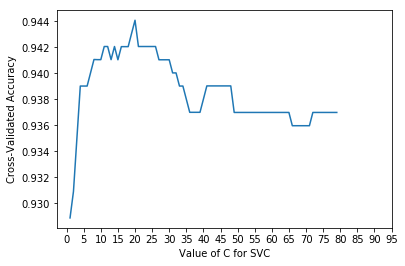

In [47]:
#파라미터값에 따른 정확도 점수 변화 추이 그래프로 살피기
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

그래프로 나타내보니 최적의 파라미터값은 20인걸로!

In [50]:
#C_range 범위 다르게 지정해서(더 촘촘하게) 다시 cross validaiton돌려보기
C_range=list(np.arange(1,30,0.1))
acc_score = []
for c in tqdm(C_range):
    svc = SVC(kernel='rbf',gamma = 'scale', C=c)
    svc.fit(X_train,y_train)
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') 
    score = np.mean(scores['test_score']) 
    acc_score.append(score) 
print(np.max(acc_score)) 
print(C_range[np.argmax(acc_score)]) 

  0%|                                                                                          | 0/290 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

  1%|▊                                                                                 | 3/290 [00:00<00:52,  5.51it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

  2%|█▋                                                                                | 6/290 [00:01<00:53,  5.36it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

  3%|██▌                                                                               | 9/290 [00:01<00:57,  4.92it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  4%|███▎                                                                             | 12/290 [00:02<00:58,  4.74it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  5%|████▏                                                                            | 15/290 [00:03<00:58,  4.70it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  6%|█████                                                                            | 18/290 [00:03<00:59,  4.60it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 12%|█████████▊                                                                       | 35/290 [00:07<00:52,  4.86it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 13%|██████████▌                                                                      | 38/290 [00:07<00:53,  4.73it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 14%|███████████▍                                                                     | 41/290 [00:08<00:51,  4.88it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 15%|████████████▎                                                                    | 44/290 [00:09<00:52,  4.72it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 16%|█████████████▏                                                                   | 47/290 [00:09<00:52,  4.65it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 24%|███████████████████▌                                                             | 70/290 [00:14<00:46,  4.69it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 26%|█████████████████████▏                                                           | 76/290 [00:16<00:44,  4.85it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 27%|██████████████████████                                                           | 79/290 [00:16<00:43,  4.81it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 43%|██████████████████████████████████▊                                             | 126/290 [00:27<00:39,  4.11it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 51%|█████████████████████████████████████████                                       | 149/290 [00:33<00:35,  4.00it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 52%|█████████████████████████████████████████▉                                      | 152/290 [00:33<00:34,  4.00it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

 58%|██████████████████████████████████████████████▌                                 | 169/290 [00:38<00:29,  4.16it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 59%|███████████████████████████████████████████████▍                                | 172/290 [00:38<00:29,  4.06it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 69%|███████████████████████████████████████████████████████▍                        | 201/290 [00:46<00:22,  4.02it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 70%|████████████████████████████████████████████████████████▎                       | 204/290 [00:46<00:21,  4.00it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 75%|████████████████████████████████████████████████████████████▏                   | 218/290 [00:50<00:17,  4.04it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 76%|████████████████████████████████████████████████████████████▉                   | 221/290 [00:51<00:17,  3.95it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 81%|████████████████████████████████████████████████████████████████▊               | 235/290 [00:54<00:13,  4.07it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 82%|█████████████████████████████████████████████████████████████████▋              | 238/290 [00:55<00:13,  3.98it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 91%|████████████████████████████████████████████████████████████████████████▊       | 264/290 [01:02<00:06,  3.96it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 99%|███████████████████████████████████████████████████████████████████████████████▏| 287/290 [01:07<00:00,  3.80it/s]C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

0.9440733869305298
19.200000000000017


최적의 파라미터(C값)은 19.2

Text(0,0.5,'Accuracy')

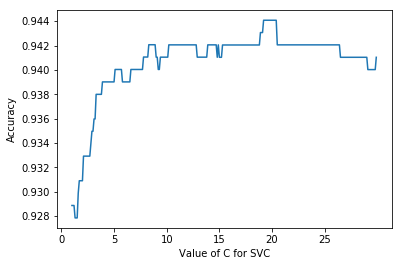

In [70]:
# 그래프도 새로 다시 그려보기
C_range=list(np.arange(1,30,0.1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,30,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Accuracy')

19~20 근방이 최적의 파라미터 값으로 보인다

In [56]:
#따라서 파라미터 조정 범위는 18.5~20으로 설정
tuned_parameters = {
 'C': (np.arange(18.5,20.5,0.2)), 'kernel': ['linear'], #이건 linear 커널
 'C': (np.arange(18.5,20.5,0.2)), 'gamma': (np.arange(1,5.1)), 'kernel': ['rbf'] #이건 rbf 커널
                   }

In [57]:
#그리드서치 진행
from sklearn.model_selection import GridSearchCV
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy', verbose = 3)
# 모델과 tuned parameter를 집어넣음! 그리고 verbose는 진행상황을 나타내주는 파라미터로 크면클수록 정보를많이줌

In [58]:
#학습시키기
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=18.5, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.608, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.551, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=18.5, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=2.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.544, total=   0.0s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.5, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.5, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.5, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.5, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=18.7, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.7, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=2.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.7, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=3.0, kernel=rbf, score=0.615, total=   0.0s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.7, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.7, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.7, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=18.9, gamma=1.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.608, total=   0.0s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.9, gamma=2.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=2.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.9, gamma=3.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.9, gamma=4.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=18.9, gamma=5.0, kernel=rbf ...................................
[CV] ....... C=18.9, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=19.099999999999998, gamma=1.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.608, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=19.099999999999998, gamma=2.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=2.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.544, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.582, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.544, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.526, total=   0.0s
[CV] C=19.099999999999998, gamma=3.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.099999999999998, gamma=4.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.099999999999998, gamma=5.0, kernel=rbf .....................
[CV]  C=19.099999999999998, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.671, total=   0.1s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=19.299999999999997, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.299999999999997, gamma=2.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=2.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.299999999999997, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.299999999999997, gamma=4.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.299999999999997, gamma=5.0, kernel=rbf .....................
[CV]  C=19.299999999999997, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.671, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.684, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=19.499999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.499999999999996, g

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.499999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=2.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.551, total=   0.0s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.526, total=   0.0s
[CV] C=19.499999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.499999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.499999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.499999999999996, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=19.699999999999996, gamma=1.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.551, total=   0.0s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=19.699999999999996, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=2.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.699999999999996, gamma=3.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.582, total=   0.0s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.699999999999996, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.699999999999996, gamma=5.0, kernel=rbf .....................
[CV]  C=19.699999999999996, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.628, total=   0.1s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.590, total=   0.1s
[CV] C=19.899999999999995, gamma=1.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=1.0, kernel=rbf, score=0.641, total=   0.1s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.608, total=   0.0s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.551, total=   0.0s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=19.899999999999995, gamma=2.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=2.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.899999999999995, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.899999999999995, gamma=4.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................
[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=19.899999999999995, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=19.899999999999995, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.595, total=   0.1s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=20.099999999999994, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=20.099999999999994, g

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.551, total=   0.0s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=20.099999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=2.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=20.099999999999994, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=3.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.526, total=   0.0s
[CV] C=20.099999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=4.0, kernel=rbf, score=0.615, total=   0.0s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=20.099999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.099999999999994, gamma=5.0, kernel=rbf, score=0.603, total=   0.1s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.570, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.671, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.684, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.595, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.590, total=   0.0s
[CV] C=20.299999999999994, gamma=1.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=1.0, kernel=rbf, score=0.641, total=   0.0s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.608, total=   0.1s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.551, total=   0.1s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=20.299999999999994, gamma=2.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=2.0, kernel=rbf, score=0.628, total=   0.0s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.557, total=   0.0s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.551, total=   0.0s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.526, total=   0.0s
[CV] C=20.299999999999994, gamma=3.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=3.0, kernel=rbf, score=0.615, total=   0.0s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.570, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.658, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.544, total=   0.0s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.538, total=   0.0s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=20.299999999999994, gamma=4.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=4.0, kernel=rbf, score=0.615, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.557, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.582, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.532, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.658, total=   0.0s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.544, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.538, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.526, total=   0.1s
[CV] C=20.299999999999994, gamma=5.0, kernel=rbf .....................
[CV]  C=20.299999999999994, gamma=5.0, kernel=rbf, score=0.603, total=   0.0s
0.6124797143784486


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   27.5s finished
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [59]:
#최고의 결과는?
print(model_svm.best_score_)

0.6124797143784486


In [60]:
#그때의 파라미터들은?
print(model_svm.best_params_) 

{'C': 18.5, 'gamma': 1.0, 'kernel': 'rbf'}


In [61]:
#최적의 파라미터로 돌려본다
svm_temp = SVC(kernel = 'rbf', gamma = 1.0, C = 18.5)

In [62]:
#train시키기
svm_temp.fit(X_train,y_train)
y_pred = svm_temp.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.6142131979695431


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
